<a href="https://colab.research.google.com/github/avvnessa/Data-Mining/blob/main/Exercicio_DM_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


# Setup

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#Carregue a base de dados Mall_Customers.csv do Google Drive observando a curagem de dados
#Substitua a palavra "<complete>" pelo comando adequado

sample_url = "/content/drive/MyDrive/colab_note_mineracao/Itapaje/Mall_Customers.csv"
sample_data = pd.read_csv(sample_url)

#print(sample_data)
#print(data)
#linha dupla e NA
sample_data = sample_data.drop_duplicates()
sample_data = sample_data.dropna()
sample_data = sample_data[~sample_data['Genero'].str.contains('\)')]

#tirar a compra negativa
sample_data = sample_data[sample_data['ComprasAnuais (R$)'] >= 0]
sample_data = sample_data[sample_data["Score de Gastos (1-100)"] < 1000]

#máximo e mínimos
max_compras_anuais = sample_data['ComprasAnuais (R$)'].max()
min_compras_anuais = sample_data['ComprasAnuais (R$)'].min()
print(min_compras_anuais)
print(max_compras_anuais)

############
max_age = sample_data['Age'].max()
min_age = sample_data['Age'].min()
print(min_age)
print(max_age)

##########

max_score = sample_data["Score de Gastos (1-100)"].max()
min_score = sample_data["Score de Gastos (1-100)"].min()
print(max_score)
print(min_score)

######

print(sample_data)
#print(sample_data.info())

####medidas de posição
media = sample_data.mean()
mediana = sample_data.median()

# Medidas de dispersão
desvio_padrao = sample_data.std()
variancia = sample_data.var()

# Imprimir os resultados
print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Variância:", variancia)


data = sample_data.iloc[:, 3:5].values  # colunas de compras e score de gastos


15
137
18
70
99
1
     ID Cliente  Genero  Age  ComprasAnuais (R$)  Score de Gastos (1-100)
0             1    Male   19                  15                       39
1             2    Male   21                  15                       81
2             3  Female   20                  16                        6
3             4  Female   23                  16                       77
4             5  Female   31                  17                       40
..          ...     ...  ...                 ...                      ...
194         195  Female   47                 120                       16
195         196  Female   35                 120                       79
197         198    Male   32                 126                       74
198         199    Male   32                 137                       18
199         200    Male   30                 137                       83

[197 rows x 5 columns]
Média: ID Cliente                 99.152284
Age                       

<ipython-input-2-7cd624357d33>:49: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media = sample_data.mean()
<ipython-input-2-7cd624357d33>:50: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = sample_data.median()
<ipython-input-2-7cd624357d33>:53: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  de

# Clusrtering usando a distância Euclidiana método Ward

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


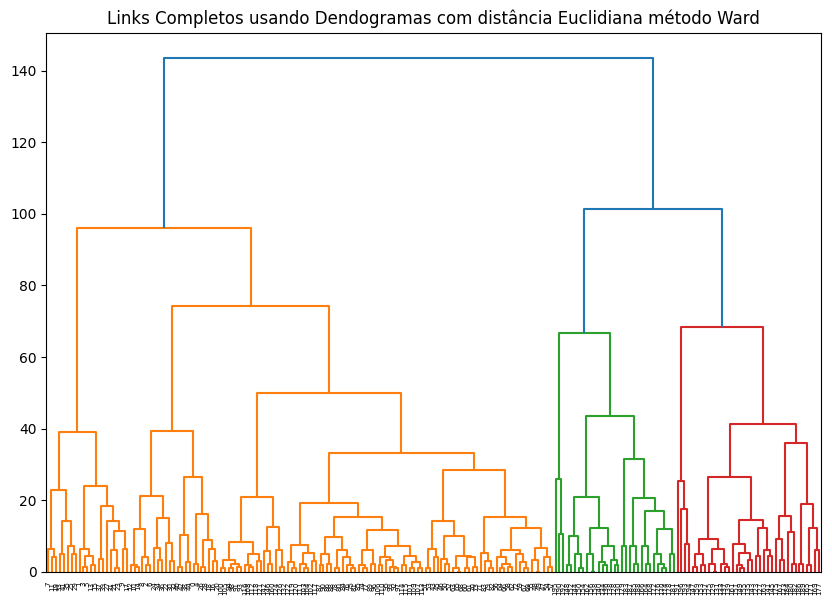

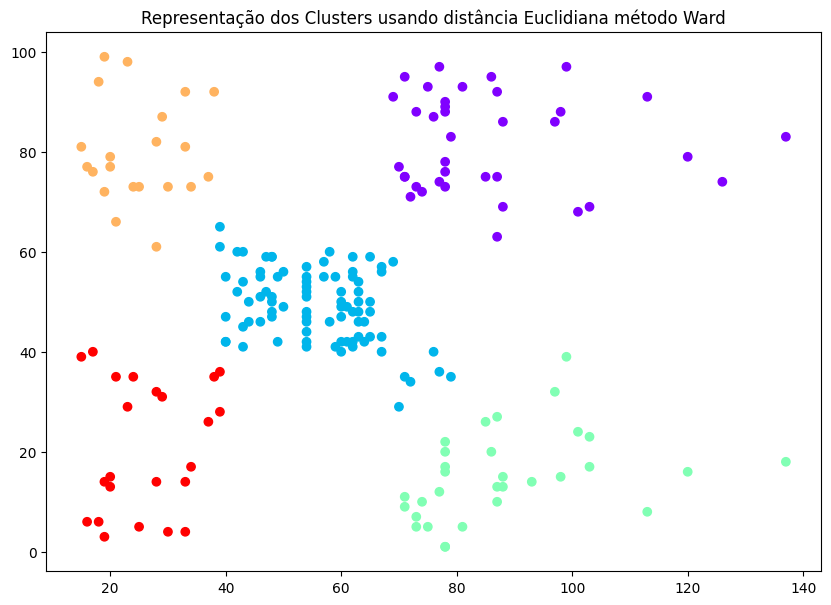

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Links Completos usando Dendogramas com distância Euclidiana método Ward")
dend = sch.dendrogram(sch.linkage(data, method='complete', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação dos Clusters usando distância Euclidiana método Ward")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


# Clusrtering usando a distância Manhattan método Ward

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


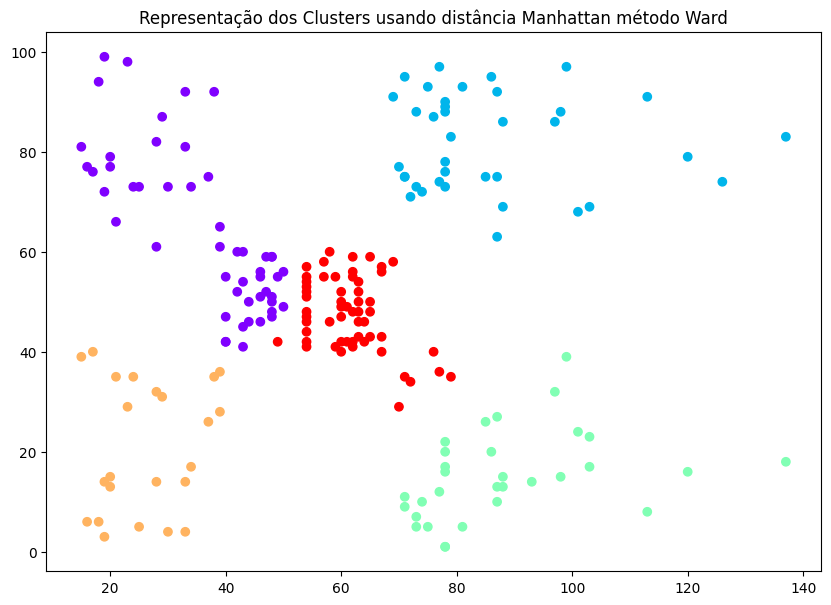

In [ ]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação dos Clusters usando distância Manhattan método Ward")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


# Representação de Clusters com uso de ligação única

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


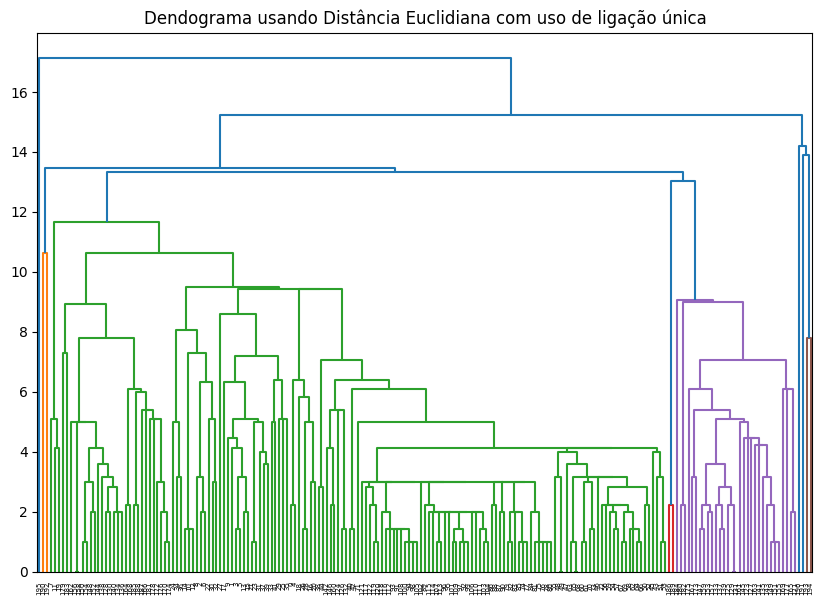

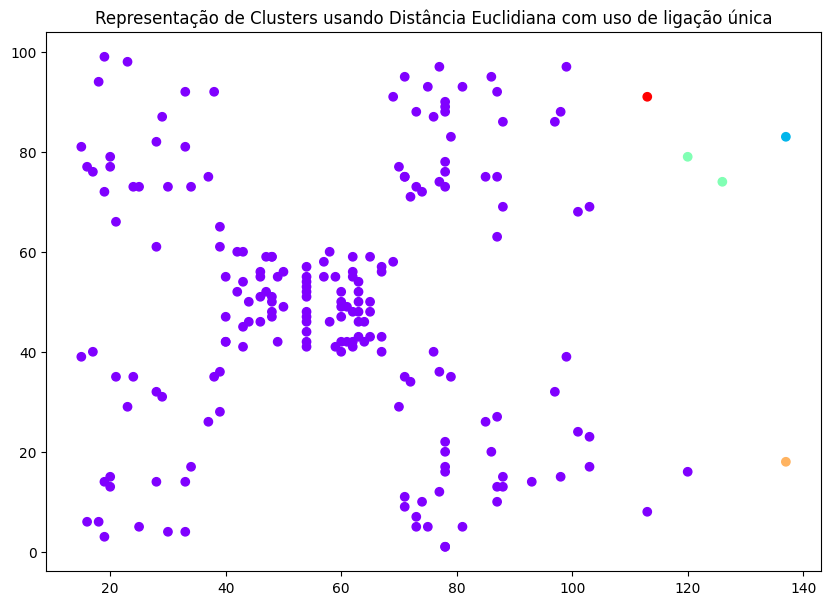

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma usando Distância Euclidiana com uso de ligação única")
dend = sch.dendrogram(sch.linkage(data, method='single', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação de Clusters usando Distância Euclidiana com uso de ligação única")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


#Representação dos Clusters usando Ligação Única e Métrica Manhathan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


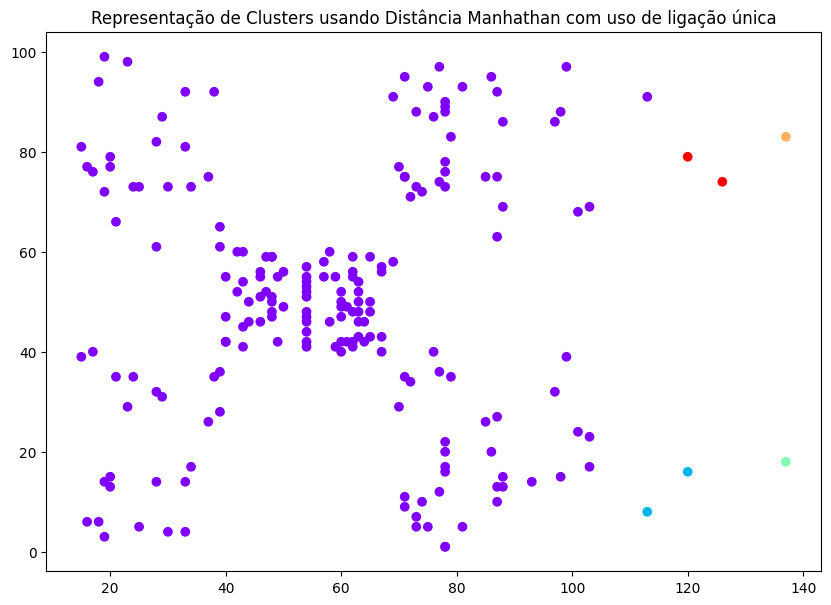

In [ ]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='single')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação de Clusters usando Distância Manhathan com uso de ligação única")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# Representação de Clusters usando Distância Euclidiana com uso de ligação pela média.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


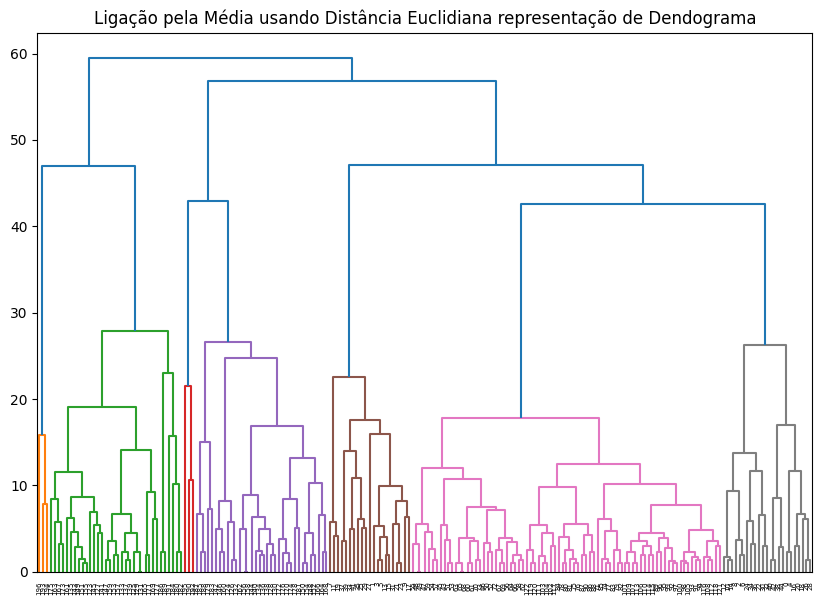

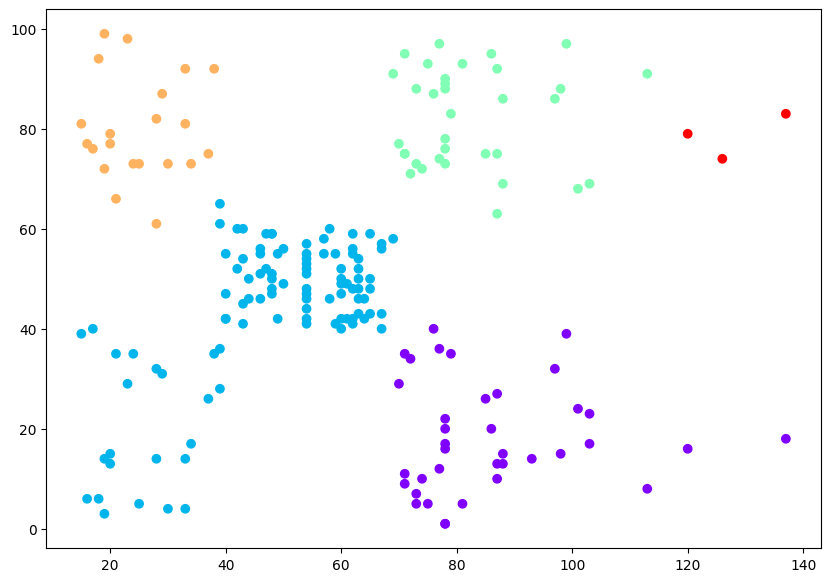

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Ligação pela Média usando Distância Euclidiana representação de Dendograma")
dend = sch.dendrogram(sch.linkage(data, method='average', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# Ligação pela Média usando Distância Manhattan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


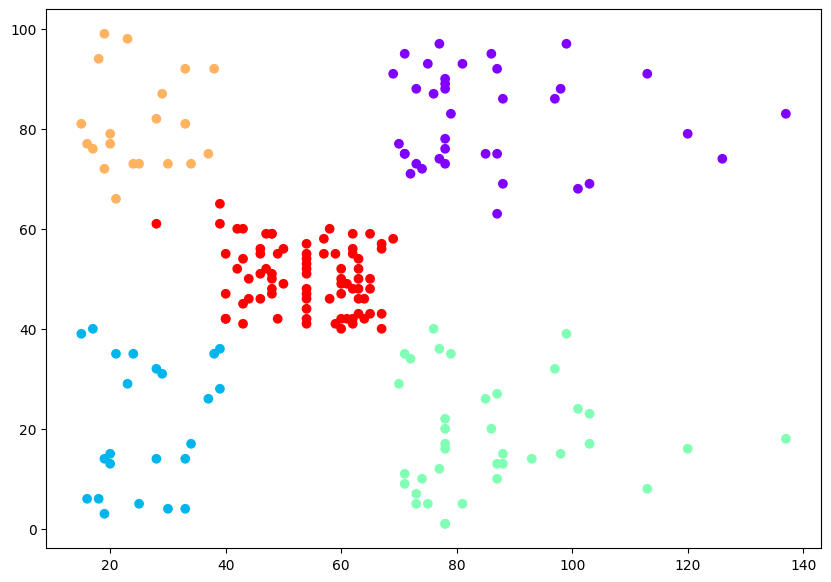

In [ ]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')